In [1]:
pip install pandas numpy scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv(r"C:\Users\Student\Desktop\New folder (3)\_crop+yield+prediction_data_crop_yield.csv")
print(data.head())

           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.76   8800  


In [6]:
# Convert categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Check if 'Yield' column exists after encoding - change 'Yield' if your target variable's name is different
if 'Yield' not in data_encoded.columns:
    raise ValueError("Target column 'Yield' not found in the data. Please check your dataset.")

X = data_encoded.drop('Yield', axis=1)  # Features
y = data_encoded['Yield']  # Target variable


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Step 7: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])


c:\Users\Student\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Mean Absolute Error: {test_mae}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6130082816.0000 - mean_absolute_error: 47446.1172
Test Mean Absolute Error: 47446.1171875


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


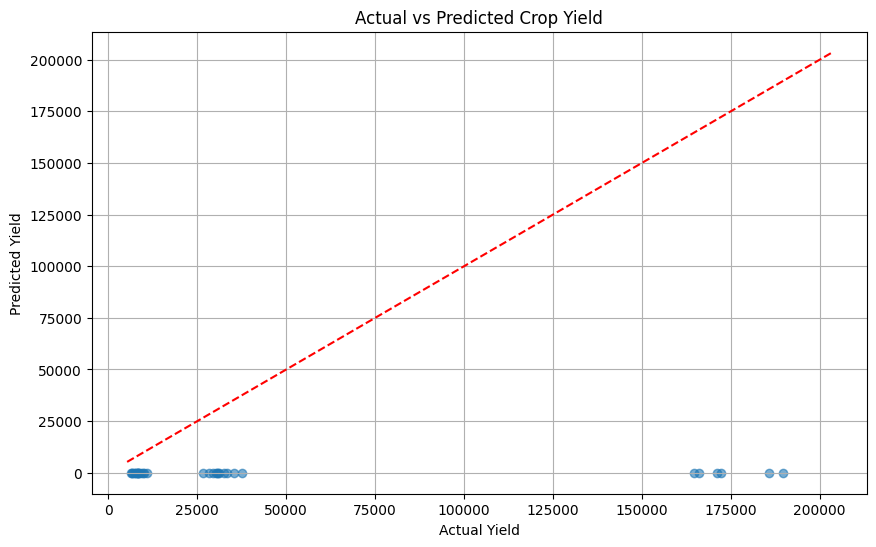

In [13]:
import matplotlib.pyplot as plt

# Make Predictions
predictions = model.predict(X_test)

# Visualize Results
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(y_test, predictions, alpha=0.6)  # Use alpha for some transparency
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line for reference
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Crop Yield')
plt.grid()  # Optional: Add grid for better readability
plt.show()